In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import jaccard_similarity_score

In [137]:
dataset=pd.read_csv('cell_samples.csv')
dataset.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [138]:
dataset.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [139]:
dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [0]:
#barenuc is object means some values are NAN or missing. We will first convert barenuc values to numeric and then making false to missing values
dataset=dataset[pd.to_numeric(dataset['BareNuc'],errors='coerce').notnull()] #notnull converts values to true and missing values to false
dataset['BareNuc']=dataset['BareNuc'].astype(int)

In [141]:
dataset.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [0]:
x=dataset.drop('Class',axis=1)
x=x.drop('ID',axis=1).values
y=dataset['Class'].values

In [143]:
x.shape

(683, 9)

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=4)
print(x_train.shape,x_test.shape)

(546, 9) (137, 9)


In [145]:
model=svm.SVC(kernel='rbf')
model1=model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred[0:5])

[2 4 2 4 2]


In [146]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[85  0]
 [ 5 47]]


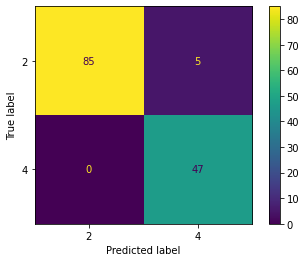

In [147]:
plot_confusion_matrix(model1,x_test,y_test)
plt.show()

In [148]:
#evaluation
f1_score(y_pred,y_test,average='weighted')
jaccard_similarity_score(y_pred,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365